In [149]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

# Data Understanding

In [150]:
df = pd.read_csv('zippedData/movie_metadata.csv')
# Imports IMDB Data

In [202]:
df.info()
df.groupby('movie_title').mean()['gross'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor                      5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  facenumber_in_poster       5030 non-null   float64
 1

movie_title
Avatar              760.505847
Titanic             658.672302
Jurassic World      652.177271
The Avengers        623.279547
The Dark Knight     533.316061
                       ...    
Zambezia                   NaN
Zipper                     NaN
Zombie Hunter              NaN
Zulu                       NaN
[Rec]                      NaN
Name: gross, Length: 4917, dtype: float64

In [152]:
df['gross'] = df['gross'].apply(lambda x: x/1000000)

The gross revenue column ('gross')  is not very digestible because it is in dollars, the code above turns it into millions 

In [153]:
def split_genres(genre):
    return genre.split('|')[0]

df['genres'] = df['genres'].apply(split_genres)

In the IMDB dataset the 'genres' column has multiple entries separated by "|". For example, the first entry is 'Action|Adventure|Fantasy|Sci-Fi'. The above cell creates a function that returns the first main genre listed (so for the first entry it would return "Action"

In [154]:
df['genres'].value_counts()

Comedy         1329
Action         1153
Drama           972
Adventure       453
Crime           349
Biography       252
Horror          232
Documentary      84
Animation        61
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Music             1
Film-Noir         1
History           1
Game-Show         1
Name: genres, dtype: int64

# Business Understanding

In [206]:
df.groupby('genres')['gross'].mean().sort_values(ascending=False)

genres
Family         149.160478
Adventure       86.325758
Animation       85.314064
Action          76.289889
Musical         61.566602
Mystery         48.822296
Fantasy         37.782735
Comedy          35.524880
Biography       35.045008
Horror          34.828279
Crime           29.989961
Drama           28.151436
Sci-Fi          26.071841
Romance         20.886339
Western         11.993216
Documentary     10.802871
Music            3.419967
Thriller         0.540970
Film-Noir             NaN
Game-Show             NaN
History               NaN
Name: gross, dtype: float64

The above cell shows the mean gross revenue for movies in each genre and sorts them from highest to lowest. There is a bit of a drop off after "Musical," so we will use the top 5 genres as a subset moving forward. It is our recommendation that Microsoft should create a movie in one of these genres -- below we will try to make some recommendations of director, actor, and movie plot! 

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


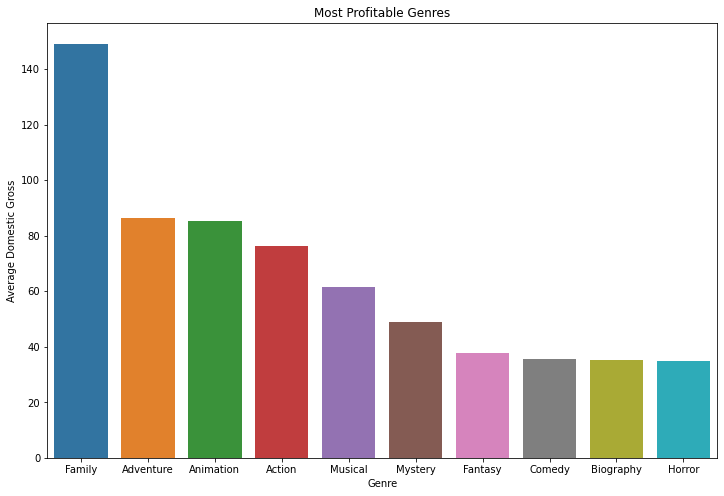

In [208]:
x = list(df.groupby('genres')['gross'].mean().sort_values(ascending=False).index[0:10])
y= list(df.groupby('genres')['gross'].mean().sort_values(ascending=False).values[0:10])

fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)
ax.set_xlabel('Genre')
ax.set_ylabel('Average Domestic Gross')
ax.set_title('Most Profitable Genres');

In [209]:
df_genre_sub = df[df['genres'].isin(['Family', 'Action', 'Adventure', 'Animation', 'Musical'])]
# Creates a new DF that only contains movies in the specified genres

In [210]:
df_genre_sub['director_name'].value_counts()[0:100]

Steven Spielberg      16
Tony Scott            12
Michael Bay           12
Ridley Scott          11
Renny Harlin          11
                      ..
Guillermo del Toro     4
John Moore             4
William Friedkin       4
George Lucas           4
Luc Besson             4
Name: director_name, Length: 100, dtype: int64

The code above shows the 100 directors who have made the most movies in the genres we have specified. 100 is a bit of an arbitrary cutoff but we wanted to select directors that had experience. Even the 100th person on this list (Luc Besson) has created 4 movies in the specified genres

In [158]:
top_100_directors_for_genre = list(df_genre_sub['director_name'].value_counts().index[0:100])
# Creates a list containing names of the 100 directors who have made the most movies in the specified genre

In [159]:
df_director_sub = df_genre_sub[df_genre_sub['director_name'].isin(top_100_directors_for_genre)]
# Uses the list above to create a new dataframe with only entries for the above directors 

In [160]:
df_director_sub.groupby('director_name').mean()['gross'].sort_values(ascending=False)

director_name
Joss Whedon          432.721657
George Lucas         406.604620
Christopher Nolan    333.470153
Andrew Adamson       284.361730
Peter Jackson        277.994940
                        ...    
John Carpenter        18.085589
Simon Wincer          17.934710
Mark L. Lester         8.687779
Hayao Miyazaki         8.035079
Uwe Boll               3.042558
Name: gross, Length: 100, dtype: float64

The code above groups the directors and shows the average gross revenue for movies they've produced. Based on the output, we should target Joss Whedon, George Lucas, Christopher Nolan, Andrew Agamson and Peter Jackson because they direct profitable movies 

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


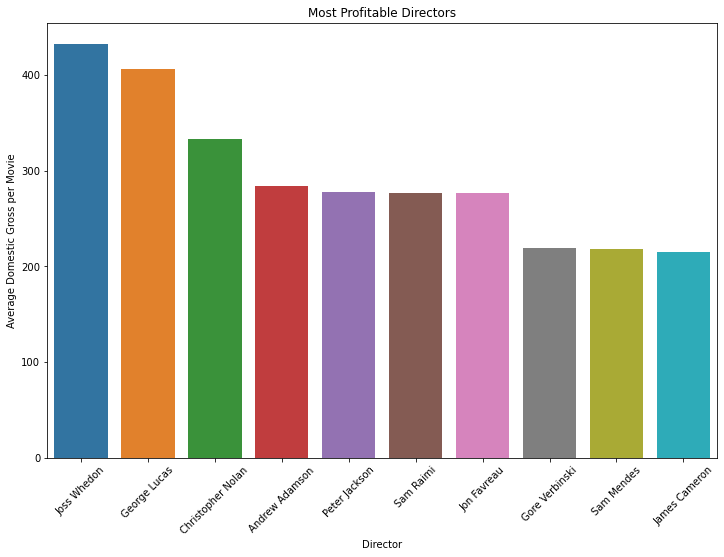

In [214]:
x = df_director_sub.groupby('director_name').mean()['gross'].sort_values(ascending=False).index[0:10]
y = df_director_sub.groupby('director_name').mean()['gross'].sort_values(ascending=False).values[0:10]

fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)
ax.set_xlabel('Director')
ax.set_ylabel('Average Domestic Gross per Movie')
ax.set_title('Most Profitable Directors');
ax.set_xticklabels(labels=x, rotation=45) ;

# Data Understanding 

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

Based on the output above, we can see that there are 3 seperate columns for actors

In [162]:
df_2 = df.copy()
df_3 = df.copy()

# Creates two copies of the DF

In [163]:
df.drop(columns=['actor_2_name', 'actor_3_name'], inplace=True)
df.rename(index=str, columns={"actor_1_name": "actor"}, inplace=True)
# Deletes the actor_2 column and actor_3 column from the original DF and renames the actor_1 column 

In [164]:
df_2.drop(columns=['actor_1_name', 'actor_3_name'], inplace=True)
df_2.rename(index=str, columns={"actor_2_name": "actor"}, inplace=True)
# Deletes the actor_1 column and actor_3 column from the original DF and renames the actor_2 column 

In [165]:
df_3.drop(columns=['actor_1_name', 'actor_2_name'], inplace=True)
df_3.rename(index=str, columns={"actor_3_name": "actor"}, inplace=True)
# Deletes the actor_1 column and actor_3 column from the original DF and renames the actor_2 column 

In [166]:
actors = pd.concat([df,df_2, df_3])

In [167]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15129 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      15072 non-null  object 
 1   director_name              14817 non-null  object 
 2   num_critic_for_reviews     14979 non-null  float64
 3   duration                   15084 non-null  float64
 4   director_facebook_likes    14817 non-null  float64
 5   actor_3_facebook_likes     15060 non-null  float64
 6   actor_1_facebook_likes     15108 non-null  float64
 7   gross                      12477 non-null  float64
 8   genres                     15129 non-null  object 
 9   actor                      15086 non-null  object 
 10  movie_title                15129 non-null  object 
 11  num_voted_users            15129 non-null  int64  
 12  cast_total_facebook_likes  15129 non-null  int64  
 13  facenumber_in_poster       15090 non-null  float64
 

In [168]:
assert actors['gross'][5043] == actors['gross'][0]

In [169]:
assert actors['actor'][5043] == actors['actor'][0]

AssertionError: 

The above code was a little clunky but we now have a dataframe with all of the actors in one column. We combined 3 indivdual dataframes. The second dataframe contained actors that were previously in the actor_2 column while the 3rd dataframe contained actors that were previously in the actor_3 column. Each of these dataframes was 5,043 rows and each row represents a movie. In the concatanated dataframe, each movie has 3 row entries, one for each actor. The assert statement above shows us that the gross revenue for row 0 is the same as the gross revenue for row 5043 (because they are the same movie!). There is an error in the second assert statement because now they have seperate actors in the actor column

# Business Understanding

In [170]:
actors_genres_sub = actors[actors['genres'].isin(['Family', 'Action', 'Adventure', 'Animation', 'Musical'])]
# This code creates a new DF with only movies in the genres we highlighted before 

In [171]:
actors_genres_sub['actor'].value_counts()[0:200]

Bruce Willis          27
Liam Neeson           21
Morgan Freeman        20
Jason Statham         20
Sylvester Stallone    20
                      ..
Margot Kidder          4
Bokeem Woodbine        4
Paul Sorvino           4
Kelly Preston          4
Gary Cole              4
Name: actor, Length: 200, dtype: int64

Similar to the exercise we did with directors, the above output shows us the actors that have been in the most movies in the genres that we had selected as most profitable

In [172]:
top_200_actors_in_genre = list(actors_genres_sub['actor'].value_counts().index[0:200])
# takes the above output and puts it into a list of actor names

In [173]:
actors_genres_sub = actors_genres_sub[actors_genres_sub['actor'].isin(top_200_actors_in_genre)]
# Filters out actors that aren't in the top 200 list we created 

In [174]:
actors_genres_sub.groupby('actor').mean()['gross'].sort_values(ascending=False)
# Sorts actors by the average profitability of the movies that they are in.

actor
Robert Downey Jr.     333.076701
Robert Pattinson      293.956643
Jennifer Lawrence     283.817172
Scarlett Johansson    266.460894
Daniel Radcliffe      253.932119
                         ...    
Michael Jai White      23.433206
Ashley Scott           20.782174
Minnie Driver          20.473460
Fisher Stevens         19.906282
Andy Lau                7.572250
Name: gross, Length: 200, dtype: float64

Based on the above, it looks like we should target Robert Downey Jr., Robert Pattinson, Jennifer Lawrence, Scarlett Johansson and Daniel Radcliffe if we want a profitable movie!

In [175]:
actors_genres_sub.groupby('actor').mean()['imdb_score'].sort_values(ascending=False)

actor
John Ratzenberger    7.890000
Tom Hanks            7.737500
Albert Finney        7.700000
Orlando Bloom        7.677778
Tom Hardy            7.575000
                       ...   
Michael Jai White    5.085714
Udo Kier             4.933333
Alexa PenaVega       4.928571
Taylor Lautner       4.900000
Jesse McCartney      4.775000
Name: imdb_score, Length: 200, dtype: float64

The above sorts the top 200 actors in the specified genres by the average IMDB score for the movies they are in. None of the names in here appear in the most profitable

# Data Understanding 

In [176]:
df_keywords1 = pd.read_csv('zippedData/movie_metadata.csv')

In [177]:
df_keywords1['plot_keywords'][0]

'avatar|future|marine|native|paraplegic'

The dataset has a column for keywords in the plot (shown above), but similar to genre it has more than one keyword per movie and the keywords are divided by a "|". 

In [178]:
def split_keyword1(keywords):
      return keywords.split('|')[0]

def split_keyword2(keywords):
        if len(keywords.split('|')) > 1:
            return keywords.split('|')[1]
        else:
            return "No second keyword"

def split_keyword3(keywords):
        if len(keywords.split('|')) > 2:
            return keywords.split('|')[2]
        else:
            return "No third keyword"

def split_keyword4(keywords):
        if len(keywords.split('|')) > 3:
            return keywords.split('|')[3]
        else:
            return "No fourth keyword"

def split_keyword5(keywords):
        if len(keywords.split('|')) > 4:
            return keywords.split('|')[4]
        else:
            return "No fifth keyword"

The code above is a little messy but it creates 5 different functions that each return one of the keywords in the column. The function "split_keyword1" returns the first keyword, the function "split_keyword2" returns the second keyword and so on. The if statement within the function exists in case there are titles with only 1 or 2 keywords. If this is the case, without the if statement there would be an error message if we attempted to run 'split_keyword5'. Instead, the function returns the string "No fifth keyword"

In [179]:
df_keywords1.dropna(subset=['plot_keywords'], inplace=True)
df_keywords1['plot_keywords'] = df_keywords1['plot_keywords'].apply(split_keyword1)

In [180]:
df_keywords2 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords2.dropna(subset=['plot_keywords'], inplace=True)
df_keywords2['plot_keywords'] = df_keywords2['plot_keywords'].apply(split_keyword2)

In [181]:
df_keywords3 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords3.dropna(subset=['plot_keywords'], inplace=True)
df_keywords3['plot_keywords'] = df_keywords3['plot_keywords'].apply(split_keyword3)

In [182]:
df_keywords4 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords4.dropna(subset=['plot_keywords'], inplace=True)
df_keywords4['plot_keywords'] = df_keywords4['plot_keywords'].apply(split_keyword4)

In [183]:
df_keywords5 = pd.read_csv('zippedData/movie_metadata.csv')
df_keywords5.dropna(subset=['plot_keywords'], inplace=True)
df_keywords5['plot_keywords'] = df_keywords5['plot_keywords'].apply(split_keyword5)

In [184]:
df_keywords = pd.concat([df_keywords1,df_keywords2, df_keywords3, df_keywords4, df_keywords5])

In [185]:
df_keywords

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Anthony Vallone,NaN,84.0,2.0,2.0,John Considine,45.0,NaN,Crime|Drama,...,1.0,English,USA,PG-13,3250.0,2005.0,44.0,7.8,NaN,4
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000


The above is a little repetitive. It creates 5 new dataframes and populated each one with one of the title keywords. dataframe 1 has the first keyword in the 'plot_keyword column', dataframe 2 has the second keyword in the 'plot_keyword' and so on. 

In [186]:
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No second keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No third keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No fourth keyword"] 
df_keywords = df_keywords[df_keywords['plot_keywords'] != "No fifth keyword"] 

# The above eliminates all the instances in which the function didn't have a keyword

# Business Understanding

In [187]:
x= list(df_keywords['plot_keywords'].value_counts().index[0:10])
y= list(df_keywords['plot_keywords'].value_counts().values[0:10])

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


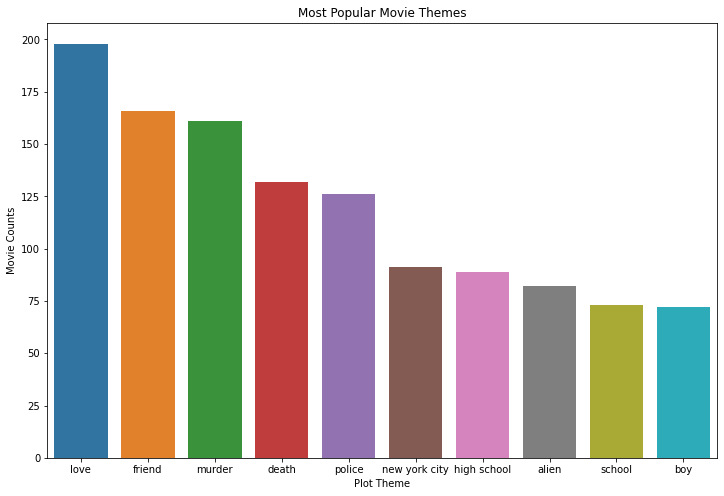

In [188]:
fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)
ax.set_xlabel('Plot Theme')
ax.set_ylabel('Movie Counts')
ax.set_title('Most Popular Movie Themes');

Using our new dataframe of keywords, we created a list of the top 10 words and their associated counts above. The plot word that appears most often is "Love", awwwwwwwww! 

In [193]:
top_100_keywords = list(df_keywords['plot_keywords'].value_counts().index[0:100])

In [194]:
df_keyword_sub = df_keywords[df_keywords['plot_keywords'].isin(top_100_keywords)]
df_keyword_sub = df_keyword_sub.dropna(subset=['gross'])

The above creates a list of 100 keywords that appear most frequently in the dataset and then filters out all movies that don't contain a keyword in this list and also filters out entries that don't have a value in the 'gross column'

In [195]:
df_keyword_sub['gross'] = df_keyword_sub['gross'].apply(lambda x: x/1000000)
df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False)

plot_keywords
superhero                   136.025491
princess                    118.124350
magic                       111.002026
battle                      101.337732
monster                      97.822698
                               ...    
gay                          20.367470
female frontal nudity        19.785387
box office flop              18.272964
title directed by female     16.599813
sex                          16.067441
Name: gross, Length: 100, dtype: float64

In [196]:
x = df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False).index[0:10]
y = df_keyword_sub.groupby('plot_keywords').mean()['gross'].sort_values(ascending=False).values[0:10]

/Users/kevinmcdonough/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


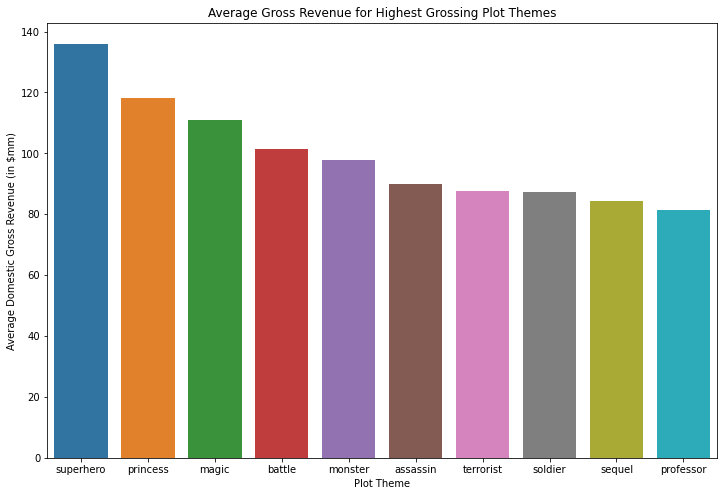

In [203]:
fig, ax = plt.subplots(figsize=[12,8])
ax = sns.barplot(x,y)
ax.set_xlabel('Plot Theme')
ax.set_ylabel('Average Domestic Gross Revenue (in $mm)')
ax.set_title('Average Gross Revenue for Highest Grossing Plot Themes');

Above, we grouped movies by keywords (aka plot themes) and then calculated the average revenue of movies containing that theme. The top 10 themes associated with the highest revenue are listed above. Due to this output, we would recommend creating a movie that has one of these themes